In [ ]:
import numpy as np
import math
import plotly.offline as offline
from plotly.graph_objs import *

**Тема 14. Численное решение интегральных уравнений Вольтерра 2-го рода.**

Уравнения Вольтерра являются частным случаям интегральных уравнений Фредгольма с наложенным условием (где K - ядро Вольтерра):  
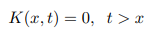

Линейное уравнение Вольтерра II рода имеет следующий вид:  
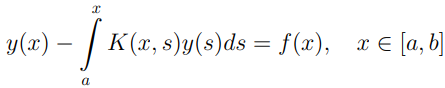

*y(x)* — неизвестная функция  
*K(x, s)* — ядро интегрального уравнения  
*f(x)* — свободный член (правая часть) интегрального уравнения. 

**Метод Квадратур**

При численном решении интегральных уравнений входящие в них интегралы обычно заменяют конечными суммами.  
Согласно методу квадратур интегральные операторы заменяют суммами, полученными с помощью различных квадратурных
формул.

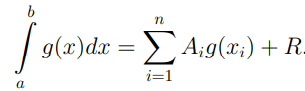

Обозначения:  
Узлы сетки: 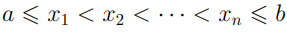  
*R*- ошибка аппроксимации квадратурной формулы (полагается малой и отбрасывается)

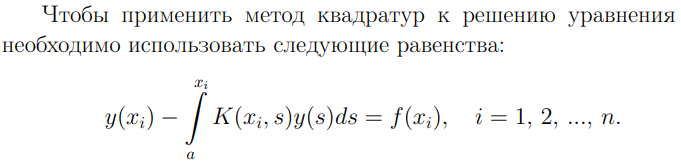

*x_i* - одно из фиксированных значений переменной *x*

Если заменить интеграл конечной суммой получим следующее:  
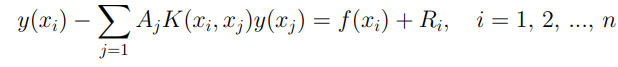

*Aj* — веса квадратурной формулы, *Ri* — ошибки аппроксимации

В измененном виде имеем:  
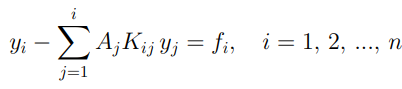

Преобразуме выражения, внося из суммы значения при *j = i*  
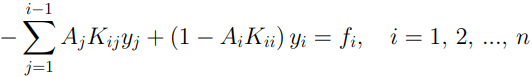

Запишем в матричном виде:  
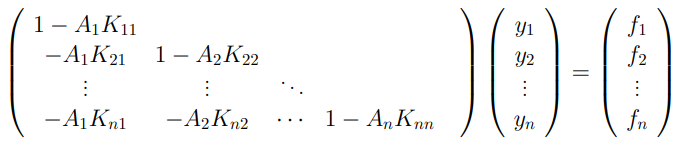

С помощью формулы трапеция установим условие на шаг для равномерной сетки  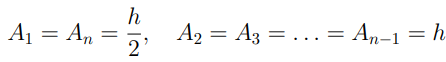

Теперь получим формулу для функции метода квадратур  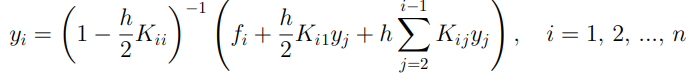

---

**Задачи**

Задача 1:
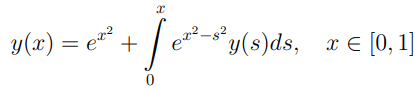

Известно точное решение: 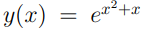

In [ ]:
def solution(x):
  return math.exp(x**2 + x)

Разложим уравнение на части

In [ ]:
def f_volt(x):
  return math.exp(x**2)

In [ ]:
def K_volt(x, s):
  return math.exp(x**2 - s**2)

Напишем функцию решения линейного интегрального уравнения Вольтерра 2-го рода

In [ ]:
def linear_volterra_2(a, b, n, h, x, f, K):
    phi = [f(a)]
    
    for i in range(1, n):
        s = 0
        j = 0
        
        while (j < i):
            s += K(x[i], x[j]) * phi[j]
            j += 1
            
        phi.append((1 / (1 - h/2 * K(x[i], x[i]))) * (f(x[i]) + h/2 * K(x[i], x[0]) * phi[0] + h * s))
    return x, phi

Зададим участок и заполним массив точек

In [170]:
a = 0.0
b = 1.0
n = 52 # количество подсегментов отрезка

h = (b - a) / (n - 1)
    
x = list(np.arange(a, b + h, h))

Найдем точки известного решения на заданном интервале

In [171]:
sol_exact = [solution(i) for i in x]
sol_exact

[1.0,
 1.020193495371487,
 1.0415953793188284,
 1.0642642730697094,
 1.0882630060785004,
 1.1136589030919124,
 1.140524095063185,
 1.1689358559045513,
 1.198976967254205,
 1.2307361136383732,
 1.2643083106332507,
 1.2997953688775357,
 1.337306397056385,
 1.376958347274326,
 1.4188766065608072,
 1.4631956386107385,
 1.5100596802570536,
 1.5596234976067807,
 1.6120532072506524,
 1.6675271684836115,
 1.7262369530549304,
 1.7883883996079295,
 1.8542027606769298,
 1.923917950890385,
 1.997789905892149,
 2.0760940624465776,
 2.1591269712476238,
 2.2472080551185267,
 2.340681526579509,
 2.439918480190134,
 2.545319176656141,
 2.657315537445092,
 2.7763738706005863,
 2.9029978506027163,
 3.037731777517483,
 3.1811641433371096,
 3.3339315363673157,
 3.496722917800868,
 3.6702843082674783,
 3.855423926211569,
 4.053017824469861,
 4.26401607645446,
 4.4894495689553215,
 4.730437464826916,
 4.988195405795092,
 5.26404453339793,
 5.559421414756808,
 5.875888969570492,
 6.215148505560264,
 6.5790529

Найдем решение уравнения методом квадратур

In [172]:
x, sol_sq1 = linear_volterra_2(a, b, n, h, x, f_volt, K_volt)
sol_sq1

[1.0,
 1.04000373118919,
 1.0618218664960293,
 1.084931643587022,
 1.109397114501301,
 1.135286914032927,
 1.1626745766978304,
 1.1916388800420639,
 1.2222642165099604,
 1.2546409962991707,
 1.2888660838580666,
 1.3250432709317728,
 1.3632837893384255,
 1.403706866959763,
 1.4464403307626383,
 1.4916212610337218,
 1.5393967014120022,
 1.5899244297466428,
 1.6433737952955947,
 1.6999266283179748,
 1.759778228705916,
 1.8231384409553324,
 1.8902328234965078,
 1.9613039212019283,
 2.0366126507686184,
 2.1164398096445494,
 2.201087720243731,
 2.290882022383712,
 2.386173628195235,
 2.487340855210847,
 2.594791754953296,
 2.7089666561332493,
 2.830340943549186,
 2.9594280959823256,
 3.096783008821125,
 3.2430056298609644,
 3.3987449397362988,
 3.5647033117898426,
 3.741641289905213,
 3.93038282697009,
 4.13182103124549,
 4.346924473048594,
 4.576744109874042,
 4.822420894451466,
 5.08519413734399,
 5.366410703621953,
 5.667535131997648,
 5.990160774692642,
 6.336022067355461,
 6.70700805069

In [173]:
def obs_error(sol1, sol2, x_list):
  res = math.sqrt(sum((sol1[i] - sol2[i])**2 for i in range(len(x_list))))
  return res

In [174]:
obs_error(sol_sq1, sol_exact, x)

0.4585736836455354

In [175]:
scatter_exact = Scatter(x = x, y = sol_exact, name = 'Точное решение', mode = 'markers + lines', showlegend = True)
scatter_sq = Scatter(x = x, y = sol_sq1, name = 'Метод квадратур', mode = 'markers + lines', showlegend = True)
data = [scatter_exact, scatter_sq]
layout = Layout(xaxis = dict(title = 'x'), yaxis = dict(title = 'y'))
fig = Figure(data = data, layout = layout)
offline.iplot(fig)

Задача 2: 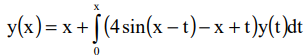

Точное решение: 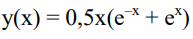

In [ ]:
def solution2(x):
  return 0.5 * x * (math.exp(-x) + math.exp(x))

In [ ]:
def f_volt2(x):
  return x

In [ ]:
def K_volt2(x, s):
  return (4 * math.sin(x - s) - x + s)

In [159]:
a = 0.0
b = 1.0
n = 32 # количество подсегментов отрезка

h = (b - a) / (n - 1)
    
x = list(np.arange(a, b + h, h))

In [160]:
sol_exact2 = [solution2(i) for i in x]
sol_exact2

[0.0,
 0.032274849563932645,
 0.06465044435017789,
 0.09722770431303739,
 0.13010789912536164,
 0.1633928236745914,
 0.1971849743238742,
 0.23158772619487164,
 0.2667055117302413,
 0.30264400079548864,
 0.3395102825819415,
 0.3774130495750108,
 0.4164627838546616,
 0.456771945998135,
 0.4984551668584424,
 0.5416294424959927,
 0.586414332544929,
 0.6329321623003366,
 0.6813082288174519,
 0.7316710113193587,
 0.7841523862154047,
 0.8388878470387247,
 0.8960167296178148,
 0.9556824428040734,
 1.0180327050846407,
 1.0832197874176868,
 1.151400762635605,
 1.2227377617702875,
 1.297398237663875,
 1.3755552362380665,
 1.4573876758052264,
 1.5430806348152437]

In [161]:
x, sol_sq2 = linear_volterra_2(a, b, n, h, x, f_volt2, K_volt2)
sol_sq2

[0.0,
 0.03225806451612903,
 0.06461680730134185,
 0.09717708116286493,
 0.13004008823833627,
 0.1633075552966668,
 0.1970819098026398,
 0.23146645700141555,
 0.26656555828047157,
 0.30248481106821523,
 0.3393312305305613,
 0.377213433329166,
 0.4162418237077675,
 0.4565287821761896,
 0.49818885706503474,
 0.5413389592279272,
 0.5860985601723664,
 0.6325898939048274,
 0.6809381627807002,
 0.731271747654999,
 0.783722422635511,
 0.8384255747461828,
 0.8955204288150902,
 0.9551502779082879,
 1.0174627196382287,
 1.0826098986832504,
 1.1507487558628933,
 1.2220412841225299,
 1.2966547917899693,
 1.374762173476355,
 1.4565421890038281,
 1.5421797507530803]

In [162]:
obs_error(sol_sq2, sol_exact2, x)

0.0024854983342566155

In [163]:
scatter_exact = Scatter(x = x, y = sol_exact2, name = 'Euler method', mode = 'markers + lines', showlegend = True)
scatter_sq = Scatter(x = x, y = sol_sq2, name = 'Point Solution', mode = 'markers + lines', showlegend = True)
data = [scatter_exact, scatter_sq]
layout = Layout(xaxis = dict(title = 'x'), yaxis = dict(title = 'y'))
fig = Figure(data = data, layout = layout)
offline.iplot(fig)

**Список источников**
1.   http://num-anal.srcc.msu.ru/prac_pos/poslist/posobie%204%20iarush%202018.pdf
2.   https://kpfu.ru/staff_files/F182952823/0_NMEQ_2019.pdf
3.   https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%82%D0%B5%D0%B3%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%83%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%92%D0%BE%D0%BB%D1%8C%D1%82%D0%B5%D1%80%D1%80%D1%8B





